# Matched Discrimination Analysis

In [1]:
import os 
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import scipy 
import scipy.stats as stats
from scipy.stats import sem 
from mpl_toolkits.mplot3d import Axes3D # <--- This is important for 3d plotting 
from sklearn.linear_model import LinearRegression


In [2]:
def combineCSVs(datafolder, num_discrim_trials):
    """
    Combine all participant data into one pandas df
    OR 
    Create df for single participant file 
    
    returns:
        (1) combined dataframe of all discrimination data 
        (2) combined dataframe of all scene property rating data 
    """
    #checks if path is a file
    isFile = os.path.isfile(datafolder)

    #checks if path is a directory
    
    isDirectory = os.path.isdir(datafolder)
    
    if isDirectory == True:
        discrim_data = []
        properties_data = []
        for filename in os.listdir(datafolder):
            if 'csv' in filename:
                path = datafolder + "/" + filename
                df = pd.read_csv(path, index_col=None, header=0)
                
                df_discrim = df[0:num_discrim_trials]
                discrim_data.append(df_discrim)
                # row 96 should be ignored - artifact of logging 
                df_properties = df[num_discrim_trials+1:]
                properties_data.append(df_properties)
                

        discrim_frame = pd.concat(discrim_data, axis=0, ignore_index=True)
        properties_frame = pd.concat(properties_data, axis=0, ignore_index=True)
        
    if isFile == True:
        if 'csv' in datafolder:
            df = pd.read_csv(datafolder, index_col=None, header=0)
            df_discrim = df[0:num_discrim_trials]
            discrim_data.append(df_discrim)
            # row 96 should be ignored - artifact of logging 
            df_properties = df[num_discrim_trials+1:]
            properties_data.append(df_properties)
 
    return discrim_frame, properties_frame

In [3]:
# data_path = '/Users/prachimahableshwarkar/Documents/GW/FacialAge/FacialAge_MTurk/BNav_EC2/DepthDuration/v2_depth_discrimination_MTurk/data'

data_path = '/Users/prachi/Documents/depth_duration/target_at_center/january2022_data/discrim_data'

In [4]:
raw_discrim, raw_ratings = combineCSVs(data_path, 100)

In [5]:
all_subjIDs = raw_discrim.subjID.unique()
len(all_subjIDs)

203

In [6]:
all_ages = raw_discrim.age.unique()
all_ages

array([30, 35, 53, 43, 59, 37, 29, 62, 28, 45, 32, 50, 56, 40, 31, 25, 63,
       38, 60, 36, 33, 27, 58, 44, 34, 49, 55, 52, 24, 46, 57, 41, 67, 47,
       39, 26, 54, 42, 48, 51, 23, 71])

## <font color='red'> Data Cleaning </font> 



In [7]:
def catchTrial_cleaning(df, correct_requirement, catch_stimuli):
    '''
    Participants complete 8 catch trials total to ensure that they are doing the task.
    If less than 7/8 catch trials are correct, the participant is excluded.  
    '''
    all_subjIDs = df.subjID.unique()
    remove = []
    subj_sequence = {}
    df2_list = []
    sequence_count = {'discrim_jsons/Discrim250_randls_33.json': 0,
 'discrim_jsons/Discrim250_randls_25.json': 0,
 'discrim_jsons/Discrim250_randls_44.json': 0,
 'discrim_jsons/Discrim250_randls_13.json': 0,
 'discrim_jsons/Discrim250_randls_7.json': 0,
 'discrim_jsons/Discrim250_randls_29.json': 0,
 'discrim_jsons/Discrim250_randls_28.json': 0,
 'discrim_jsons/Discrim250_randls_6.json': 0,
 'discrim_jsons/Discrim250_randls_12.json': 0,
 'discrim_jsons/Discrim250_randls_45.json': 0,
 'discrim_jsons/Discrim250_randls_24.json': 0,
 'discrim_jsons/Discrim250_randls_32.json': 0,
 'discrim_jsons/Discrim250_randls_42.json': 0,
 'discrim_jsons/Discrim250_randls_15.json': 0,
 'discrim_jsons/Discrim250_randls_39.json': 0,
 'discrim_jsons/Discrim250_randls_1.json': 0,
 'discrim_jsons/Discrim250_randls_19.json': 0,
 'discrim_jsons/Discrim250_randls_35.json': 0,
 'discrim_jsons/Discrim250_randls_23.json': 0,
 'discrim_jsons/Discrim250_randls_22.json': 0,
 'discrim_jsons/Discrim250_randls_34.json': 0,
 'discrim_jsons/Discrim250_randls_18.json': 0,
 'discrim_jsons/Discrim250_randls_38.json': 0,
 'discrim_jsons/Discrim250_randls_0.json': 0,
 'discrim_jsons/Discrim250_randls_14.json': 0,
 'discrim_jsons/Discrim250_randls_43.json': 0,
 'discrim_jsons/Discrim250_randls_3.json': 0,
 'discrim_jsons/Discrim250_randls_17.json': 0,
 'discrim_jsons/Discrim250_randls_40.json': 0,
 'discrim_jsons/Discrim250_randls_21.json': 0,
 'discrim_jsons/Discrim250_randls_37.json': 0,
 'discrim_jsons/Discrim250_randls_36.json': 0,
 'discrim_jsons/Discrim250_randls_20.json': 0,
 'discrim_jsons/Discrim250_randls_41.json': 0,
 'discrim_jsons/Discrim250_randls_16.json': 0,
 'discrim_jsons/Discrim250_randls_2.json': 0,
 'discrim_jsons/Discrim250_randls_27.json': 0,
 'discrim_jsons/Discrim250_randls_9.json': 0,
 'discrim_jsons/Discrim250_randls_31.json': 0,
 'discrim_jsons/Discrim250_randls_5.json': 0,
 'discrim_jsons/Discrim250_randls_11.json': 0,
 'discrim_jsons/Discrim250_randls_46.json': 0,
 'discrim_jsons/Discrim250_randls_10.json': 0,
 'discrim_jsons/Discrim250_randls_4.json': 0,
 'discrim_jsons/Discrim250_randls_8.json': 0,
 'discrim_jsons/Discrim250_randls_30.json': 0,
 'discrim_jsons/Discrim250_randls_26.json': 0,
 'discrim_jsons/Discrim1000_randls_20.json': 0,
 'discrim_jsons/Discrim1000_randls_7.json': 0,
 'discrim_jsons/Discrim1000_randls_36.json': 0,
 'discrim_jsons/Discrim1000_randls_41.json': 0,
 'discrim_jsons/Discrim1000_randls_16.json': 0,
 'discrim_jsons/Discrim1000_randls_17.json': 0,
 'discrim_jsons/Discrim1000_randls_40.json': 0,
 'discrim_jsons/Discrim1000_randls_37.json': 0,
 'discrim_jsons/Discrim1000_randls_6.json': 0,
 'discrim_jsons/Discrim1000_randls_21.json': 0,
 'discrim_jsons/Discrim1000_randls_10.json': 0,
 'discrim_jsons/Discrim1000_randls_26.json': 0,
 'discrim_jsons/Discrim1000_randls_1.json': 0,
 'discrim_jsons/Discrim1000_randls_30.json': 0,
 'discrim_jsons/Discrim1000_randls_31.json': 0,
 'discrim_jsons/Discrim1000_randls_0.json': 0,
 'discrim_jsons/Discrim1000_randls_27.json': 0,
 'discrim_jsons/Discrim1000_randls_11.json': 0,
 'discrim_jsons/Discrim1000_randls_46.json': 0,
 'discrim_jsons/Discrim1000_randls_12.json': 0,
 'discrim_jsons/Discrim1000_randls_45.json': 0,
 'discrim_jsons/Discrim1000_randls_28.json': 0,
 'discrim_jsons/Discrim1000_randls_32.json': 0,
 'discrim_jsons/Discrim1000_randls_3.json': 0,
 'discrim_jsons/Discrim1000_randls_24.json': 0,
 'discrim_jsons/Discrim1000_randls_25.json': 0,
 'discrim_jsons/Discrim1000_randls_2.json': 0,
 'discrim_jsons/Discrim1000_randls_33.json': 0,
 'discrim_jsons/Discrim1000_randls_29.json': 0,
 'discrim_jsons/Discrim1000_randls_44.json': 0,
 'discrim_jsons/Discrim1000_randls_13.json': 0,
 'discrim_jsons/Discrim1000_randls_18.json': 0,
 'discrim_jsons/Discrim1000_randls_34.json': 0,
 'discrim_jsons/Discrim1000_randls_5.json': 0,
 'discrim_jsons/Discrim1000_randls_22.json': 0,
 'discrim_jsons/Discrim1000_randls_14.json': 0,
 'discrim_jsons/Discrim1000_randls_43.json': 0,
 'discrim_jsons/Discrim1000_randls_38.json': 0,
 'discrim_jsons/Discrim1000_randls_9.json': 0,
 'discrim_jsons/Discrim1000_randls_8.json': 0,
 'discrim_jsons/Discrim1000_randls_39.json': 0,
 'discrim_jsons/Discrim1000_randls_42.json': 0,
 'discrim_jsons/Discrim1000_randls_15.json': 0,
 'discrim_jsons/Discrim1000_randls_23.json': 0,
 'discrim_jsons/Discrim1000_randls_4.json': 0,
 'discrim_jsons/Discrim1000_randls_35.json': 0,
 'discrim_jsons/Discrim1000_randls_19.json': 0}
    
    for subj in all_subjIDs:
#         print(subj)
        count_correct = 0
        subj_df = df.loc[df['subjID'] == subj]
        cleaned_subj_df = subj_df.copy(deep=True) # prevent setting with copy warning
        # 
        subj_sequence[subj] = subj_df.sequenceName.unique()[0]
        
        # remove trials that are outside the outlier range
        c = 0
        c_missed = 0
        for idx, row in subj_df.iterrows():
            stim1 = row['stimulus_0']
            stim2 = row['stimulus_1']
            # TEMP SOLUTION FOR RANDOM PHP DATA SAVING PROBLEM 
            if type(stim1) == str:
                if stim1.split('/')[1] in catch_stimuli or stim2.split('/')[1] in catch_stimuli:
                    ####### VERSION WHERE CATCH TRIALS ARE ATTENTION CHECK: IMAGE 1 IS THE SAME AS IMAGE 2
                    c += 1
                    if row["discrim_choice"] == 3:
#                         print(row["discrim_choice"])
                        count_correct += 1
#                     else:
#                         print(row["discrim_choice"])
                    # remove catch trial 
                    cleaned_subj_df.drop([idx], inplace=True)
    #                 print(depth0, depth1, correct_choice, choice)
#         print(c_missed, 'Number of catch trials where participants did not see the target')
#         print(c)
#         print(count_correct)
        if count_correct < correct_requirement:
#             print('Number correct:', count_correct)
            remove.append(subj)
        else:
            sequence_count[subj_df.sequenceName.unique()[0]] += 1
        
        df2_list.append(cleaned_subj_df)
    
    df2 = pd.concat(df2_list)
    print("Number of participants that did not pass the catch trial check:", len(remove))
    print("Participants that were removed:",remove)
#     print("Sequences that need to be replaced:")
#     for subj in remove:
#         print(subj_sequence[subj])
#     print("Sequence count:")
#     print(sequence_count)
    for index, row in df2.iterrows():
        if row['subjID'] in remove:
            df2.drop(index, inplace=True)
    
    return df2
    
    

In [8]:
# raw_discrim.stimulus_0

In [9]:
# all_catch_stim = ['000375_2014-06-08_11-17-29_260595134347_rgbf000133-resize_2',
#               '000569_2014-06-09_22-51-47_260595134347_rgbf000141-resize_3',
#               '000787_2014-06-08_22-33-53_260595134347_rgbf000175-resize_1',
#               '002072_2014-06-24_21-48-06_260595134347_rgbf000115-resize_0',
#               '002364_2014-06-28_20-11-05_260595134347_rgbf000042-resize_0',
#               '002675_2014-06-13_16-08-49_094959634447_rgbf000151-resize_2',
#               '003125_2014-05-12_10-39-22_094959634447_rgbf000100-resize_0',
#               '003395_2014-05-20_15-39-18_094959634447_rgbf000101-resize_0',
#               '000454_2014-06-08_16-37-28_260595134347_rgbf000048-resize_2',
#               '000868_2014-06-09_20-49-52_260595134347_rgbf000064-resize_4',
#               '000953_2014-06-08_11-42-19_260595134347_rgbf000083-resize_0',
#               '001012_2014-06-08_23-19-38_260595134347_rgbf000057-resize_0',
#               '001170_2014-06-17_15-43-44_260595134347_rgbf000096-resize_6',
#               '001222_2014-06-17_16-24-06_260595134347_rgbf000073-resize_0',
#               '001498_2014-06-19_17-45-14_260595134347_rgbf000129-resize_4',
#               '001540_2014-06-20_17-01-05_260595134347_rgbf000086-resize_2']

all_catch_stim = ['000375_2014-06-08_11-17-29_260595134347_rgbf000133-resize_2',
                  '000569_2014-06-09_22-51-47_260595134347_rgbf000141-resize_3',
                  '000787_2014-06-08_22-33-53_260595134347_rgbf000175-resize_1',
                  '002072_2014-06-24_21-48-06_260595134347_rgbf000115-resize_0',
                  '001170_2014-06-17_15-43-44_260595134347_rgbf000096-resize_6',
                  '001222_2014-06-17_16-24-06_260595134347_rgbf000073-resize_0',
                  '001498_2014-06-19_17-45-14_260595134347_rgbf000129-resize_4',
                  '001540_2014-06-20_17-01-05_260595134347_rgbf000086-resize_2']


In [10]:
catch_cleaned_discrim = catchTrial_cleaning(raw_discrim, 7, all_catch_stim)

Number of participants that did not pass the catch trial check: 112
Participants that were removed: [772183.0, 838816.0, 401746.0, 580863.0, 168006.0, 402710.0, 106558.0, 928209.0, 578519.0, 973883.0, 257946.0, 446835.0, 533644.0, 630281.0, 476553.0, 363571.0, 871257.0, 835724.0, 169133.0, 265550.0, 280126.0, 587123.0, 738295.0, 705649.0, 172931.0, 653628.0, 764353.0, 596798.0, 580281.0, 769034.0, 615459.0, 773532.0, 939462.0, 270605.0, 250927.0, 479907.0, 852717.0, 628938.0, 723399.0, 968335.0, 670189.0, 493741.0, 488643.0, 200784.0, 188346.0, 509453.0, 617406.0, 595691.0, 110296.0, 858027.0, 537762.0, 551830.0, 494974.0, 268229.0, 822232.0, 782613.0, 723057.0, 920203.0, 916710.0, 382321.0, 988872.0, 589703.0, 134718.0, 661574.0, 368727.0, 126003.0, 425814.0, 857609.0, 129631.0, 309644.0, 952703.0, 711217.0, 685597.0, 902310.0, 520915.0, 124831.0, 100067.0, 449862.0, 151527.0, 109287.0, 231985.0, 238865.0, 138566.0, 853661.0, 216777.0, 612756.0, 974672.0, 836975.0, 315730.0, 915553.0,

In [11]:
cleaned_ages = catch_cleaned_discrim.age.unique()
cleaned_ages

array([35, 53, 43, 59, 37, 28, 45, 50, 40, 32, 30, 31, 33, 27, 44, 34, 49,
       55, 46, 58, 41, 29, 25, 38, 67, 57, 24, 60, 56, 47, 26, 42, 63, 48,
       51])

In [12]:
def RT_cleaning(df, outlier_range, num_trials):
    all_subjIDs = df.subjID.unique()
    remove = []
    df2_list = []
    for subj in all_subjIDs:
        count = 0
        subj_df = df.loc[df['subjID'] == subj]
        cleaned_subj_df = subj_df.copy(deep=True) # prevent setting with copy warning
        
        # calculate subject's average trial RT
        average_trial_RT = subj_df["trial_RT"].mean()
        std_trial_RT = subj_df["trial_RT"].std()
        p_outlier_range = [(average_trial_RT - (3*std_trial_RT)), (average_trial_RT + (3*std_trial_RT))]
        
        # remove trials that are outside the outlier range
        for idx, row in subj_df.iterrows():
            RT = row['trial_RT']
            if RT < outlier_range[0]:
                cleaned_subj_df.drop([idx], inplace=True)
                count += 1
            if RT > outlier_range[1]:
                cleaned_subj_df.drop([idx], inplace=True)
                count += 1
            try:
                if RT < p_outlier_range[0]:
                    cleaned_subj_df.drop([idx], inplace=True)
                    count += 1
                if RT > p_outlier_range[1]:
                    cleaned_subj_df.drop([idx], inplace=True)
                    count += 1
            except:
                pass
#                 print("Trial already removed")
                
        threshold = math.floor(num_trials * 0.1)
        if count >= threshold:
            remove.append(subj)
        
        df2_list.append(cleaned_subj_df)
    
    df2 = pd.concat(df2_list)
    print("Number of Participants with 10% or more trials outside their RT range:", len(remove))
    
    for index, row in df2.iterrows():
        if row['subjID'] in remove:
            df2.drop(index, inplace=True)
    
    return df2


In [13]:
cleaned_discrim = RT_cleaning(catch_cleaned_discrim, [250,5000], 94)



Number of Participants with 10% or more trials outside their RT range: 3


In [14]:
def finalTrialCountCheck(df, num_trials):
    """
    If more then 10% of a participants data is missing, remove the participant
    """
    #List unique values in the df['subjID'] column\n",
    all_subjIDs = df.subjID.unique()
    remove = []
    for subj in all_subjIDs:
        subj_df = df.loc[df['subjID'] == subj]
        count_trials = len(subj_df.index)
        threshold_trials_remaining = num_trials - math.floor(num_trials * 0.1)
        
        if count_trials <= threshold_trials_remaining:
            remove.append(subj)
    print("Number of Participants with >= 10% trials removed:", len(remove))
    
    for index, row in df.iterrows():
        if row['subjID'] in remove:
            df.drop(index, inplace=True)
    
    print("Number of participants left:",len(df.subjID.unique()))
    
    return df

In [15]:
final_discrim = finalTrialCountCheck(cleaned_discrim, 94)

Number of Participants with >= 10% trials removed: 1
Number of participants left: 87


In [16]:
# sequences that are completed

sampled_urls = final_discrim.url.unique()


<!-- ## Sequences that need replacing

Final N = 192 

Each sequence should have 48 participants -->

In [17]:
sampled_urls

array(['http://54.173.230.142/FacialAge/BNav_EC2/DepthDuration/v2_depth_discrimination_MTurk/v2_DepthDiscrim_HTML.html#10',
       'http://54.173.230.142/FacialAge/BNav_EC2/DepthDuration/v2_depth_discrimination_MTurk/v2_DepthDiscrim_HTML.html#12',
       'http://54.173.230.142/FacialAge/BNav_EC2/DepthDuration/v2_depth_discrimination_MTurk/v2_DepthDiscrim_HTML.html#8',
       'http://54.173.230.142/FacialAge/BNav_EC2/DepthDuration/v2_depth_discrimination_MTurk/v2_DepthDiscrim_HTML.html#44',
       'http://54.173.230.142/FacialAge/BNav_EC2/DepthDuration/v2_depth_discrimination_MTurk/v2_DepthDiscrim_HTML.html#52',
       'http://54.173.230.142/FacialAge/BNav_EC2/DepthDuration/v2_depth_discrimination_MTurk/v2_DepthDiscrim_HTML.html#15',
       'http://54.173.230.142/FacialAge/BNav_EC2/DepthDuration/v2_depth_discrimination_MTurk/v2_DepthDiscrim_HTML.html#59',
       'http://54.173.230.142/FacialAge/BNav_EC2/DepthDuration/v2_depth_discrimination_MTurk/v2_DepthDiscrim_HTML.html#93',
       'h

In [18]:
# final list of subjects 
final_discrim.subjID.unique()

array([315782., 867529., 105706., 745111., 599222., 522038., 445907.,
       920738., 976796., 954281., 203219., 415153., 979339., 673024.,
       148804., 647515., 848116., 169096., 460884., 295021., 528433.,
       732287., 535106., 672282., 680113., 862822., 694029., 978955.,
       371659., 105875., 901154., 287695., 701929., 148212., 749559.,
       271488., 294749., 549214., 369194., 675852., 945405., 384426.,
       388602., 894754., 752831., 557338., 994502., 959931., 620795.,
       297038., 430903., 806621., 799561., 254093., 179520., 142868.,
       608549., 655801., 129930., 227280., 284809., 653690., 183853.,
       762618., 824014., 210627., 363534., 974039., 791328., 320717.,
       807609., 333688., 395721., 803688., 701816., 837628., 325921.,
       436946., 287602., 464873., 779965., 168478., 842654., 239362.,
       380692., 321161., 701538.])

# Correlation with Verbal Report data 

- For each discrimination trial, get the average difference between the verbal report for those scenes 
- Correlate that with the proportion correct for that trial 
- Is there better accuracy for scenes that have a larget percevied depth difference (using the verbal report data)?

## Individual Discriminations

In [57]:
def get_accuracy(df):
    """
    * ACCURACY BASED ON THE KINECT
    args:
        df  
    returns:
        proportion of correct responses, count of correct responses, count of total trials  
    """
    count_correct = 0
    count_incorrect = 0
    count_total = 0
    count_missed = 0
    for idx, row in df.iterrows():
        choice = row["discrim_choice"]
        if choice == 2.0:
            count_missed += 1
        else:    
            count_total += 1
            depth0 = row["actual_depth_0"]
            depth1 = row["actual_depth_1"]
            if depth0 < depth1:
                correct_choice = 0
            if depth0 > depth1:
                correct_choice = 1
            if depth0 == depth1:
                # case where depths are equal 
                correct_choice = None
            if choice == correct_choice:
                count_correct += 1
    
    return count_correct/count_total, count_correct, count_total, count_missed

def get_RT(df):
    """
    args:
        df  
    returns:
        array of RTs, avg RT and std   
    """
    list_RTs = []
    for idx, row in df.iterrows():   
        stimulus_duration = row['log_sceneDuration2']
        RT = row["trial_RT"] - stimulus_duration
        list_RTs.append(RT)
    
    list_RTs = np.array(list_RTs)
    
    return list_RTs, np.mean(list_RTs) ,np.std(list_RTs), stats.sem(list_RTs)

In [20]:
def depth_differences(df):
    """
    args:
        df  
    returns:
        array of depth differences, avg depth differences and std   
    """
    depth_diffs = []
    answers = []
    for idx, row in df.iterrows():
        depth0 = row["actual_depth_0"]
        depth1 = row["actual_depth_1"]
        
        diff = depth0-depth1
        if diff < 0:
            answer = row['stimulus_0']
        else:
            answer = row['stimulus_1']
        answers.append(answer)
        depth_diffs.append(abs(depth0-depth1))
    
    depth_diffs = np.array(depth_diffs)
    
    return depth_diffs, np.mean(depth_diffs) ,np.std(depth_diffs),answers
    

In [21]:
all_depth_diffs = depth_differences(final_discrim)

# add depth difference column to dataframe 
final_discrim.insert(18, "depth_difference", all_depth_diffs[0])

In [22]:
final_discrim.insert(19, "kinect_answer", all_depth_diffs[-1])

In [23]:
def individual_discrimination_stats(df):
    '''
    Individual discrimination performance and RT 
    '''
    all_stim0 = df.stimulus_0.unique()
    
    stimuli_stats = {}
    for stim0 in all_stim0:
        stim0_df = df.loc[df['stimulus_0'] == stim0]
        other_stim = stim0_df.stimulus_1.unique()[0]
        stim1_df = df.loc[df['stimulus_1'] == stim0]
        # df for a specific discrimination trial (collapsed on stim presentation order)
        stim_df = pd.concat([stim0_df, stim1_df], ignore_index=True)
        stim_250_df = stim_df[stim_df['duration'] == 250.0]
        stim_1000_df = stim_df[stim_df['duration'] == 1000.0] 
                
        stim_depthdiff = stim_df['depth_difference'][0]
        
        stim0_depth = stim_df['actual_depth_0'][0]
        stim1_depth = stim_df['actual_depth_1'][0]
        stim_depthbin = np.mean(np.array([stim0_depth,stim1_depth]))
        
        kinect_answer = stim0_df.kinect_answer.unique()[0]
        
        try:
            stim_acc_250 = get_accuracy(stim_250_df)
            stim_acc_1000 = get_accuracy(stim_1000_df)

            stim_RT_250 = get_RT(stim_250_df)
            stim_RT_1000 = get_RT(stim_1000_df)

            stimuli_stats[stim0] = {'stimulus_1': other_stim,
                                    'accuracy_250': stim_acc_250,
                                    'accuracy_1000': stim_acc_1000,
                                    'avg_depth': stim_depthbin,
                                    'depthdifference': stim_depthdiff, 
                                    'RT_250': stim_RT_250,
                                    'RT_1000': stim_RT_1000,
                                    'kinect_answer': kinect_answer}
        except:
            pass
    
    return stimuli_stats

In [24]:
all_discrim_performance = individual_discrimination_stats(final_discrim)


## Load Normalized TAC Verbal Judgement Data


In [28]:

TAC_normed_individual_trial_data_path = '/Users/prachi/Documents/depth_duration/depth_duration_analysis/TAC_npy_files/matchedVE/normalized/'

# x data
with open(TAC_normed_individual_trial_data_path + 'n_X_250.npy' , 'rb') as f:
    n_TAC_X_250 = np.load(f, allow_pickle=True)

with open(TAC_normed_individual_trial_data_path + 'n_X_1000.npy' , 'rb') as f:
    n_TAC_X_1000 = np.load(f, allow_pickle=True)
# y data 
with open(TAC_normed_individual_trial_data_path + 'n_final_y_250.npy' , 'rb') as f:
    n_TAC_final_y_250 = np.load(f, allow_pickle=True)
    
with open(TAC_normed_individual_trial_data_path + 'n_final_y_1000.npy' , 'rb') as f:
    n_TAC_final_y_1000= np.load(f, allow_pickle=True)

# std data
with open(TAC_normed_individual_trial_data_path + 'n_std_250.npy' , 'rb') as f:
    n_TAC_std_250 = np.load(f, allow_pickle=True)

with open(TAC_normed_individual_trial_data_path + 'n_std_1000.npy' , 'rb') as f:
    n_TAC_std_1000 = np.load(f, allow_pickle=True)
    
# ste data
with open(TAC_normed_individual_trial_data_path + 'n_ste_250.npy' , 'rb') as f:
    n_TAC_ste_250 = np.load(f, allow_pickle=True)

with open(TAC_normed_individual_trial_data_path + 'n_ste_1000.npy' , 'rb') as f:
    n_TAC_ste_1000 = np.load(f, allow_pickle=True)

# stim data
with open(TAC_normed_individual_trial_data_path + 'n_final_stim_250.npy' , 'rb') as f:
    TAC_final_stim_250 = np.load(f, allow_pickle=True)

with open(TAC_normed_individual_trial_data_path + 'n_final_stim_1000.npy' , 'rb') as f:
    TAC_final_stim_1000 = np.load(f, allow_pickle=True)

# Code depth discrimination correctness by the verbal judgement data 

Create new 'ground truth' answer based on verbal judgement data

Task: Respond which image's target was closer to you

## Normalized VE Data

In [29]:
n_VE_answerkey_250 = {} # corresponding answer key for discrimination trials  

for key in all_discrim_performance.keys():
    targetimg0 = key.split('/')[-1]
    folder0 = targetimg0[:-11]
    depth_dur_path0 = 'depth_duration_stimuli/' + folder0 + '/' + targetimg0
    idx0 = np.where(TAC_final_stim_250 == depth_dur_path0)[0][0]
    avg_estim_stim0 = n_TAC_final_y_250[idx0]
    std0 = n_TAC_std_250[idx0]
    ste0 = n_TAC_ste_250[idx0]
    
    targetimg1 = all_discrim_performance[key]['stimulus_1'].split('/')[-1]
    folder1 = targetimg1[:-11]
    depth_dur_path1 = 'depth_duration_stimuli/' + folder1 + '/' + targetimg1
    idx1= np.where(TAC_final_stim_250 == depth_dur_path1)[0][0]
    avg_estim_stim1 = n_TAC_final_y_250[idx1]
    std1 = n_TAC_std_250[idx1]
    ste1 = n_TAC_ste_250[idx1]
    
    kinect_answer = all_discrim_performance[key]['kinect_answer'].split('/')[-1]

    if avg_estim_stim0 < avg_estim_stim1:
        # Which target is CLOSER to you?
        answer = targetimg0
    if avg_estim_stim0 == avg_estim_stim1:
        print(targetimg0, targetimg1)
    if avg_estim_stim0 > avg_estim_stim1:
        answer = targetimg1

    n_VE_answerkey_250[key] = {'stimulus_1': targetimg1,
                             'stimulus_0_avg_estim': avg_estim_stim0,
                             'stimulus_1_avg_estim': avg_estim_stim1,
                             'answer': answer,
                             'std0': std0,
                             'std1': std1,
                             'kinect_answer': kinect_answer}
    

In [30]:
len(n_VE_answerkey_250), n_VE_answerkey_250['depth_discrimination_stimuli/002118_2014-06-25_20-32-08_260595134347_rgbf000078-resize_1/002118_2014-06-25_20-32-08_260595134347_rgbf000078-resize_1-target.png']


(94,
 {'stimulus_1': '001516_2014-06-20_16-25-09_260595134347_rgbf000076-resize_2-target.png',
  'stimulus_0_avg_estim': 0.9226206714135269,
  'stimulus_1_avg_estim': 0.7409469798308169,
  'answer': '001516_2014-06-20_16-25-09_260595134347_rgbf000076-resize_2-target.png',
  'std0': 0.2683895243741899,
  'std1': 0.2709475561047894,
  'kinect_answer': '001516_2014-06-20_16-25-09_260595134347_rgbf000076-resize_2-target.png'})

In [32]:
n_VE_answerkey_1000 = {} # corresponding answer key for discrimination trials  

for key in all_discrim_performance.keys():
    targetimg0 = key.split('/')[-1]
    folder0 = targetimg0[:-11]
    depth_dur_path0 = 'depth_duration_stimuli/' + folder0 + '/' + targetimg0
    idx0 = np.where(TAC_final_stim_1000 == depth_dur_path0)[0][0]
    avg_estim_stim0 = n_TAC_final_y_1000[idx0]
    std0 = n_TAC_std_1000[idx0]

    targetimg1 = all_discrim_performance[key]['stimulus_1'].split('/')[-1]
    folder1 = targetimg1[:-11]
    depth_dur_path1 = 'depth_duration_stimuli/' + folder1 + '/' + targetimg1
    idx1= np.where(TAC_final_stim_1000 == depth_dur_path1)[0][0]
    avg_estim_stim1 = n_TAC_final_y_1000[idx1]
    std1 = n_TAC_std_1000[idx1]
    
    if avg_estim_stim0 < avg_estim_stim1:
        # Which target is CLOSER to you?
        answer = targetimg0
    if avg_estim_stim0 == avg_estim_stim1:
        print(targetimg0, targetimg1)
    if avg_estim_stim0 > avg_estim_stim1:
        answer = targetimg1
    
    kinect_answer = all_discrim_performance[key]['kinect_answer'].split('/')[-1]



    n_VE_answerkey_1000[key] = {'stimulus_1': targetimg1,
                             'stimulus_0_avg_estim': avg_estim_stim0,
                             'stimulus_1_avg_estim': avg_estim_stim1,
                             'answer': answer,
                             'std0': std0,
                             'std1': std1,
                             'kinect_answer': kinect_answer}
    

In [33]:
len(n_VE_answerkey_1000), n_VE_answerkey_1000['depth_discrimination_stimuli/002118_2014-06-25_20-32-08_260595134347_rgbf000078-resize_1/002118_2014-06-25_20-32-08_260595134347_rgbf000078-resize_1-target.png']


(94,
 {'stimulus_1': '001516_2014-06-20_16-25-09_260595134347_rgbf000076-resize_2-target.png',
  'stimulus_0_avg_estim': 0.9019008811251704,
  'stimulus_1_avg_estim': 0.7497280960581257,
  'answer': '001516_2014-06-20_16-25-09_260595134347_rgbf000076-resize_2-target.png',
  'std0': 0.2656412570284583,
  'std1': 0.19561620727680093,
  'kinect_answer': '001516_2014-06-20_16-25-09_260595134347_rgbf000076-resize_2-target.png'})

### VE Coded Accuracy

In [86]:
def VE_accuracy(stim0, df, answerkey):
    '''
    Accuracy based on the verbal judgement data 
    '''
    
    """
    args:
        df  
    returns:
        proportion of correct responses, count of correct responses, count of total trials  
    """
    count_correct = 0
    count_incorrect = 0
    count_total = 0
    count_missed = 0
    
    VE_correct_answer = answerkey[stim0]['answer']
    kinect_correct_answer = answerkey[stim0]['kinect_answer']
    
    for idx, row in df.iterrows(): 
        choice = row["discrim_choice"]
        count_total += 1
        if choice == 0.0:
            image_choice = row["stimulus_0"]
                
        if choice == 1.0:
            image_choice = row["stimulus_1"]
                
        if choice == 2.0:
            count_missed += 1
            
        if choice == 3.0:
            count_missed += 1
        
        try:
            if image_choice.split('/')[-1] == VE_correct_answer:
                count_correct += 1
        except:
            pass
        
#     standardError = (0.5*(1-0.5))/count_total
    p = count_correct/count_total
    standardError = np.sqrt((p*(1-p))/count_total)
    
    if VE_correct_answer == kinect_correct_answer:
        return count_correct/count_total, count_correct, count_total, count_missed, standardError, 'pos'
    else:
        return count_correct/count_total, count_correct, count_total, count_missed, standardError, 'neg'

    
def main_VE_accuracy(df, answerkey_250, answerkey_1000):
    all_stim0 = df.stimulus_0.unique()
    
    stimuli_stats = {}
    for stim0 in all_stim0:
        try:
            # dataframe for stimulus 0
            stim0_df = df.loc[df['stimulus_0'] == stim0]
            # name of stimulus 1
            other_stim = stim0_df.stimulus_1.unique()[0]
            # dataframe where stimulus 0 is presented SECOND (same trial)
            stim1_df = df.loc[df['stimulus_1'] == stim0]

            # df for a specific discrimination trial (collapsed on stim presentation order)
            stim_df = pd.concat([stim0_df, stim1_df], ignore_index=True)
            stim_250_df = stim_df[stim_df['duration'] == 250.0]
            stim_1000_df = stim_df[stim_df['duration'] == 1000.0] 

            stim0_depth = stim_df['actual_depth_0'][0]
            stim1_depth = stim_df['actual_depth_1'][0]
            stim_depthbin = np.mean(np.array([stim0_depth,stim1_depth]))

            stim_acc_250 = VE_accuracy(stim0, stim_250_df, answerkey_250)
            stim_acc_1000 = VE_accuracy(stim0, stim_1000_df, answerkey_1000)

            stim_RT_250 = get_RT(stim_250_df)
            stim_RT_1000 = get_RT(stim_1000_df)

            # difference between verbal judgements divided by joint variance 
            # abs(VE1-VE2)/sqrt(stda^2 + std2^2)
            std0_250 = answerkey_250[stim0]['std0']
            std1_250 = answerkey_250[stim0]['std1']
            joint_variance_250 = np.sqrt(std0_250**2 + std1_250**2)
            JV_regressor_250 = abs(answerkey_250[stim0]['stimulus_0_avg_estim'] - answerkey_250[stim0]['stimulus_1_avg_estim'])/joint_variance_250

            std0_1000 = answerkey_1000[stim0]['std0']
            std1_1000 = answerkey_1000[stim0]['std1']
            joint_variance_1000 = np.sqrt(std0_1000**2 + std1_1000**2)
            JV_regressor_1000 = abs(answerkey_1000[stim0]['stimulus_0_avg_estim'] - answerkey_1000[stim0]['stimulus_1_avg_estim'])/joint_variance_1000
            
            if stim_acc_250[-1] == 'pos':
                VE_depthdifference_250 = abs(answerkey_250[stim0]['stimulus_0_avg_estim'] - answerkey_250[stim0]['stimulus_1_avg_estim'])
            else:
                VE_depthdifference_250 = -(abs(answerkey_250[stim0]['stimulus_0_avg_estim'] - answerkey_250[stim0]['stimulus_1_avg_estim']))
            
            if stim_acc_1000[-1] == 'pos':
                VE_depthdifference_1000 = abs(answerkey_1000[stim0]['stimulus_0_avg_estim'] - answerkey_1000[stim0]['stimulus_1_avg_estim'])
            else:
                VE_depthdifference_1000 = -(abs(answerkey_1000[stim0]['stimulus_0_avg_estim'] - answerkey_1000[stim0]['stimulus_1_avg_estim']))
            
            stimuli_stats[stim0] = {'stimulus_1': other_stim,
                                    'accuracy_250': stim_acc_250,
                                    'accuracy_1000': stim_acc_1000,
                                    'avg_depth': stim_depthbin,
                                    'VE_depthdifference_250': VE_depthdifference_250, 
                                    'VE_depthdifference_1000': VE_depthdifference_1000,
                                    'RT_250': stim_RT_250,
                                    'RT_1000': stim_RT_1000,
                                    'JV_regressor_250': JV_regressor_250,
                                    'JV_regressor_1000': JV_regressor_1000}
            
#             stimuli_stats[stim0] = {'stimulus_1': other_stim,
#                                     'accuracy_250': stim_acc_250,
#                                     'accuracy_1000': stim_acc_1000,
#                                     'avg_depth': stim_depthbin,
#                                     'VE_depthdifference_250': abs(answerkey_250[stim0]['stimulus_0_avg_estim'] - answerkey_250[stim0]['stimulus_1_avg_estim']), 
#                                     'VE_depthdifference_1000': abs(answerkey_1000[stim0]['stimulus_0_avg_estim'] - answerkey_1000[stim0]['stimulus_1_avg_estim']),
#                                     'RT_250': stim_RT_250,
#                                     'RT_1000': stim_RT_1000,
#                                     'JV_regressor_250': JV_regressor_250,
#                                     'JV_regressor_1000': JV_regressor_1000}
        except:
            print(stim0)

    return stimuli_stats
    

In [87]:
n_all_VE_discrim_performance = main_VE_accuracy(final_discrim, n_VE_answerkey_250, n_VE_answerkey_1000) 

In [81]:
len(n_all_VE_discrim_performance)


94

In [88]:
n_VE_estim_diff_250 = [n_all_VE_discrim_performance[elem]['VE_depthdifference_250'] for elem in n_all_VE_discrim_performance]
n_VE_estim_diff_1000 = [n_all_VE_discrim_performance[elem]['VE_depthdifference_1000'] for elem in n_all_VE_discrim_performance]

n_VE_accuracy_250 = [n_all_VE_discrim_performance[elem]['accuracy_250'][0] for elem in n_all_VE_discrim_performance]
n_VE_accuracy_1000 = [n_all_VE_discrim_performance[elem]['accuracy_1000'][0] for elem in n_all_VE_discrim_performance]

n_VE_ste_250 = [n_all_VE_discrim_performance[elem]['accuracy_250'][-2] for elem in n_all_VE_discrim_performance]
n_VE_ste_1000 = [n_all_VE_discrim_performance[elem]['accuracy_1000'][-2] for elem in n_all_VE_discrim_performance]

n_avg_RT_250 = [n_all_VE_discrim_performance[elem]['RT_250'][1] for elem in n_all_VE_discrim_performance]
n_avg_RT_1000 = [n_all_VE_discrim_performance[elem]['RT_1000'][1] for elem in n_all_VE_discrim_performance]

n_avg_RT_ste_250 = [n_all_VE_discrim_performance[elem]['RT_250'][-1] for elem in n_all_VE_discrim_performance]
n_avg_RT_ste_1000 = [n_all_VE_discrim_performance[elem]['RT_1000'][-1] for elem in n_all_VE_discrim_performance]


n_JV_250 = [n_all_VE_discrim_performance[elem]['JV_regressor_250'] for elem in n_all_VE_discrim_performance]
n_JV_1000 = [n_all_VE_discrim_performance[elem]['JV_regressor_1000'] for elem in n_all_VE_discrim_performance]

n_stim = [elem for elem in n_all_VE_discrim_performance]

#### Overall Accuracy: Coded by Normalized VE

In [89]:
np.mean(n_VE_accuracy_250), np.mean(n_VE_accuracy_1000)

(0.74507878274069, 0.7499774294628024)

In [39]:
print('250 ms: Correlation between VE discrimination accuracy and average normalized verbal estimate difference')
stats.pearsonr(n_VE_accuracy_250, n_VE_estim_diff_250)

250 ms: Correlation between VE discrimination accuracy and average normalized verbal estimate difference


(0.5971777441610558, 2.1098633526924773e-10)

In [40]:
print('1000 ms: Correlation between VE discrimination accuracy and average normalized verbal estimate difference')
stats.pearsonr(n_VE_accuracy_1000, n_VE_estim_diff_1000)

1000 ms: Correlation between VE discrimination accuracy and average normalized verbal estimate difference


(0.6724833891375381, 1.1511472834957692e-13)

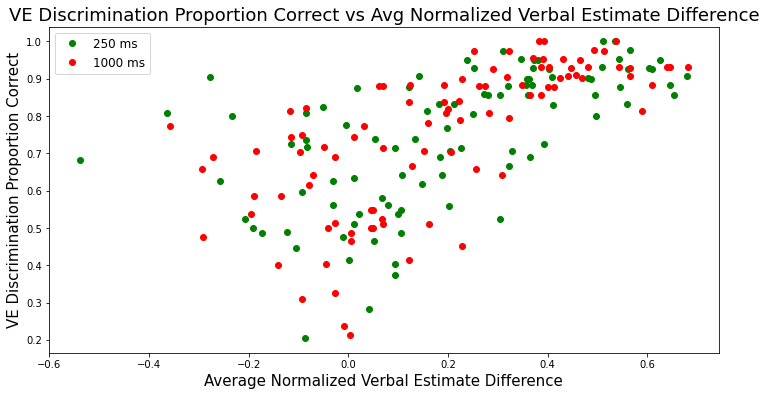

In [41]:
plt.figure(figsize=[12,6])
plt.plot(np.array(n_VE_estim_diff_250), np.array(n_VE_accuracy_250), 'go', label='250 ms')
plt.plot(np.array(n_VE_estim_diff_1000), np.array(n_VE_accuracy_1000), 'ro', label='1000 ms')
plt.xlabel('Average Normalized Verbal Estimate Difference', fontsize=15)
plt.ylabel('VE Discrimination Proportion Correct', fontsize = 15)
plt.legend(fontsize = 12)
plt.title('VE Discrimination Proportion Correct vs Avg Normalized Verbal Estimate Difference', fontsize = 18)
plt.show();

In [42]:
len(n_VE_accuracy_250)

94

In [43]:
at_chance = np.array([0.5] * 94)

In [44]:
ttest_VEPC_250 = stats.ttest_ind(n_VE_accuracy_250, at_chance)
print('Independent Samples T-Test: VE PC @ 250 ms: ', ttest_VEPC_250)

Independent Samples T-Test: VE PC @ 250 ms:  Ttest_indResult(statistic=13.04308708462991, pvalue=4.90376804078215e-28)


In [45]:
ttest_VEPC_1000 = stats.ttest_ind(n_VE_accuracy_1000, at_chance)
print('Independent Samples T-Test: VE PC @ 1000 ms: ', ttest_VEPC_1000)

Independent Samples T-Test: VE PC @ 1000 ms:  Ttest_indResult(statistic=12.387225342605499, pvalue=4.3611072042977604e-26)


In [46]:
def get_super(x):
    normal = "ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz0123456789+-=()"
    super_s = "ᴬᴮᶜᴰᴱᶠᴳᴴᴵᴶᴷᴸᴹᴺᴼᴾQᴿˢᵀᵁⱽᵂˣʸᶻᵃᵇᶜᵈᵉᶠᵍʰᶦʲᵏˡᵐⁿᵒᵖ۹ʳˢᵗᵘᵛʷˣʸᶻ⁰¹²³⁴⁵⁶⁷⁸⁹⁺⁻⁼⁽⁾"
    res = x.maketrans(''.join(normal), ''.join(super_s))
    return x.translate(res)

m: [0.42021149]
b: 0.6611488122400175
R-squared:  0.35662125812128753


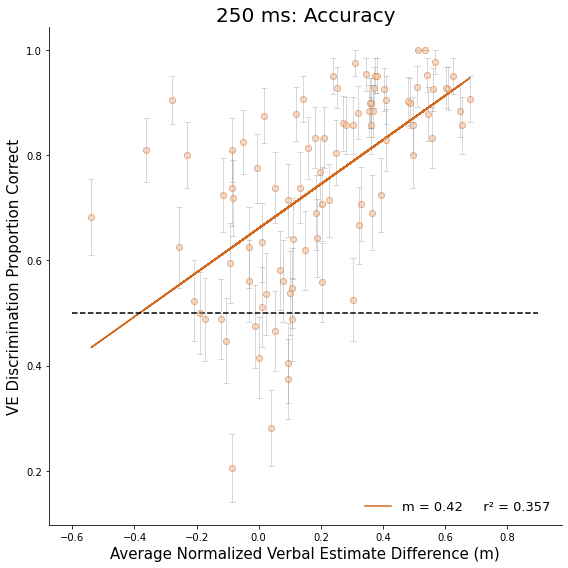

In [49]:
fig, ax = plt.subplots(figsize=[8,8])
right_side = ax.spines['right']
right_side.set_visible(False)
top = ax.spines['top']
top.set_visible(False)


#run regression
VE_X_250 = np.array(n_VE_estim_diff_250).reshape(-1,1)
VE_PC_250 = n_VE_accuracy_250
VE_PC_reg_250 = LinearRegression().fit(VE_X_250, VE_PC_250)

#Generated Predictions
PC_predicted_250 = VE_PC_reg_250.predict(VE_X_250)
#Plot Our Actual and Predicted Values
plt.errorbar(VE_X_250, VE_PC_250,elinewidth=1, ecolor='gray', fmt='or', mfc='white', mec='chocolate', capsize=3, alpha = 0.3, yerr = np.array(n_VE_ste_250));


plt.plot(VE_X_250, VE_PC_250, 'o', color='chocolate', alpha = 0.3);
plt.plot(VE_X_250, PC_predicted_250,color='chocolate', label = 'm = ' + str(round(VE_PC_reg_250.coef_[0], 3))
         + '     r' + get_super('2') + ' = '+ str(round(float(VE_PC_reg_250.score(VE_X_250, VE_PC_250)), 3)))
plt.xlabel("Average Normalized Verbal Estimate Difference (m)", fontsize = 15)
plt.ylabel("VE Discrimination Proportion Correct", fontsize = 15)

plt.plot([-0.6, 0.9], [0.5,0.5], '--', color='black')



#get coefficients and y intercept
print("m: {0}".format(VE_PC_reg_250.coef_))
print("b: {0}".format(VE_PC_reg_250.intercept_))

#Returns the coefficient of determination R^2 of the prediction.
print("R-squared: ", VE_PC_reg_250.score(VE_X_250, VE_PC_250))

legend = plt.legend(loc = 4, fontsize=13, labelspacing=1, frameon=False)

plt.title("250 ms: Accuracy", fontsize = 20)
# plt.xticks(np.arange(-1,1.25, 0.25))
# plt.yticks(np.arange(0,1.2, 0.2))

fig.tight_layout()

plt.show();

m: [0.52899193]
b: 0.651272696500567
R-squared:  0.45223390866590973


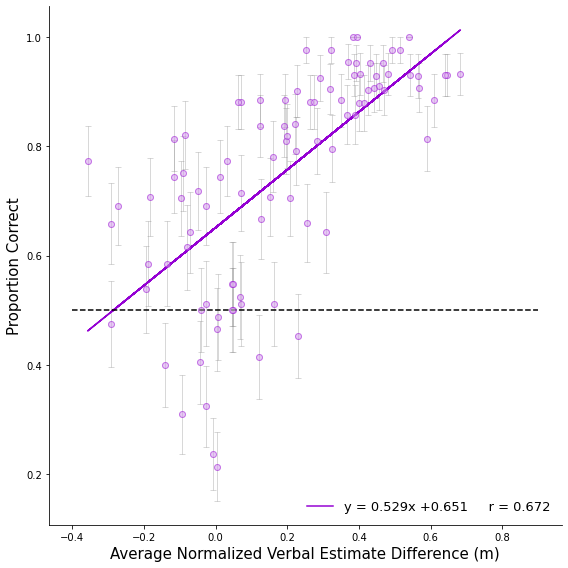

In [91]:
fig, ax = plt.subplots(figsize=[8,8])
right_side = ax.spines['right']
right_side.set_visible(False)
top = ax.spines['top']
top.set_visible(False)


VE_X_1000 = np.array(n_VE_estim_diff_1000).reshape(-1,1)
VE_PC_1000 = n_VE_accuracy_1000
VE_PC_reg_1000 = LinearRegression().fit(VE_X_1000, VE_PC_1000)

#Generated Predictions
PC_predicted_1000 = VE_PC_reg_1000.predict(VE_X_1000)
#Plot Our Actual and Predicted Values

r = np.sqrt(float(VE_PC_reg_1000.score(VE_X_1000, VE_PC_1000)))

plt.errorbar(VE_X_1000, VE_PC_1000, elinewidth=1, ecolor='gray', fmt='or', mfc='white', mec='darkviolet', capsize=3, alpha = 0.3, yerr = np.array(n_VE_ste_1000));
plt.plot(VE_X_1000, VE_PC_1000, 'o', color='darkviolet', alpha = 0.3);
plt.plot(VE_X_1000, PC_predicted_1000,color='darkviolet', label = 'y = ' + str(round(VE_PC_reg_1000.coef_[0], 3))
        +'x +'+str(round(VE_PC_reg_1000.intercept_, 3))  + '     r = '+ str(round(r, 3)))

legend = plt.legend(loc = 4, fontsize=13, labelspacing=1, frameon=False)

plt.plot([-0.4, 0.9], [0.5,0.5], '--', color='black')


#get coefficients and y intercept
print("m: {0}".format(VE_PC_reg_1000.coef_))
print("b: {0}".format(VE_PC_reg_1000.intercept_))

#Returns the coefficient of determination R^2 of the prediction.
print("R-squared: ", VE_PC_reg_1000.score(VE_X_1000, VE_PC_1000))

plt.xlabel("Average Normalized Verbal Estimate Difference (m)", fontsize = 15)
plt.ylabel("Proportion Correct", fontsize = 15)


# plt.title("1000 ms: Accuracy", fontsize = 20)

# plt.xticks(np.arange(-1,1.2, 0.2))
# plt.yticks(np.arange(-1,1.2, 0.2))

fig.tight_layout()

plt.show();

In [ ]:
stats.pearsonr(n_VE_accuracy_250, n_VE_accuracy_1000)

In [ ]:
plt.figure(figsize=[7,7])
plt.xlabel('Proportion Correct @ 250 ms', fontsize=15)
plt.ylabel('Proportion Correct @ 1000 ms', fontsize=15)
plt.plot(n_VE_accuracy_250,n_VE_accuracy_1000, 'o' )

m: [-306.07593608]
b: 1246.1432142552655
R-squared:  0.383497673128778


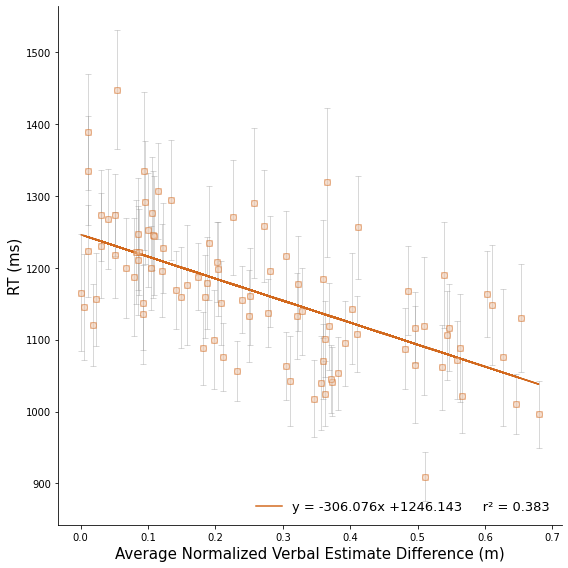

In [74]:
fig, ax = plt.subplots(figsize=[8,8])
right_side = ax.spines['right']
right_side.set_visible(False)
top = ax.spines['top']
top.set_visible(False)

#run regression
X_250 = np.array(n_VE_estim_diff_250).reshape(-1,1)
y_250 = n_avg_RT_250
reg_250 = LinearRegression().fit(X_250, y_250)

#Generated Predictions
y_predicted_250 = reg_250.predict(X_250)
#Plot Our Actual and Predicted Values
plt.errorbar(X_250, y_250,elinewidth=1, ecolor='gray',fmt='or', mfc='white', mec='chocolate', capsize=3, alpha = 0.3, yerr = np.array(n_avg_RT_ste_250));

plt.plot(X_250, y_250, 's', color='chocolate', alpha = 0.3);
plt.plot(X_250, y_predicted_250,color='chocolate', label = 'y = ' + str(round(reg_250.coef_[0], 3))
        +'x +'+str(round(reg_250.intercept_, 3))  + '     r' + get_super('2') + ' = '+ str(round(float(reg_250.score(X_250, y_250)), 3)))

plt.xlabel("Average Normalized Verbal Estimate Difference (m)", fontsize = 15)
plt.ylabel("RT (ms)", fontsize = 15)


legend = plt.legend(loc = 4, fontsize=13, labelspacing=1, frameon=False)

fig.tight_layout()

# plt.xticks(np.arange(0.15,1.2, 0.2))
plt.yticks(np.arange(900,1600, 100))


#get coefficients and y intercept
print("m: {0}".format(reg_250.coef_))
print("b: {0}".format(reg_250.intercept_))

#Returns the coefficient of determination R^2 of the prediction.
print("R-squared: ", reg_250.score(X_250, y_250))

In [92]:
stats.pearsonr(n_VE_estim_diff_1000, n_avg_RT_1000)

(-0.43208885574236156, 1.3695330804476162e-05)

In [93]:
-0.43208885574236156 ** 2

-0.18670077925674333

m: [-121.15406644]
b: 1089.4768680910063
R-squared:  0.18670077925674322


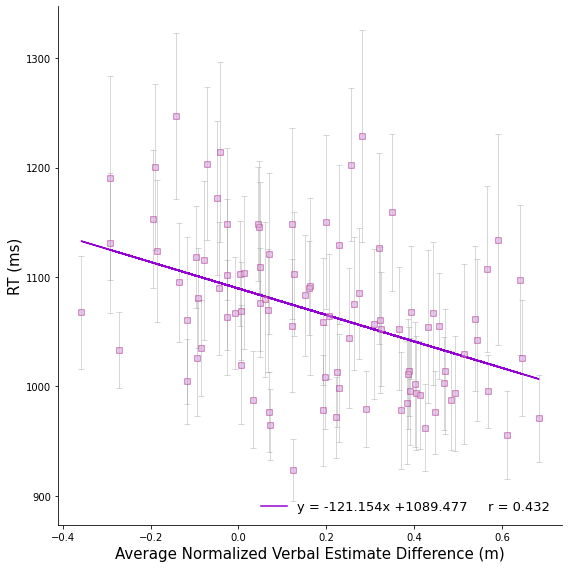

In [95]:

fig, ax = plt.subplots(figsize=[8,8])
right_side = ax.spines['right']
right_side.set_visible(False)
top = ax.spines['top']
top.set_visible(False)

#run regression
X_1000 = np.array(n_VE_estim_diff_1000).reshape(-1,1)
y_1000 = n_avg_RT_1000
reg_1000 = LinearRegression().fit(X_1000, y_1000)

#Generated Predictions
y_predicted_1000 = reg_1000.predict(X_1000)
#Plot Our Actual and Predicted Values

plt.errorbar(X_1000, y_1000, elinewidth=1, ecolor='gray', fmt='or', mfc='white', mec='chocolate', capsize=3, alpha = 0.3, yerr = np.array(n_avg_RT_ste_1000));

r = np.sqrt(float(reg_1000.score(X_1000, y_1000)))

plt.plot(X_1000, y_1000, 's', color='darkviolet', alpha = 0.3);
plt.plot(X_1000, y_predicted_1000,color='darkviolet', label = 'y = ' + str(round(reg_1000.coef_[0], 3))
        +'x +'+str(round(reg_1000.intercept_, 3))  + '     r = '+ str(round(float(r), 3)))

plt.xlabel("Average Normalized Verbal Estimate Difference (m)", fontsize = 15)
plt.ylabel("RT (ms)", fontsize = 15)


legend = plt.legend(loc = 4, fontsize=13, labelspacing=1, frameon=False)

fig.tight_layout()

plt.yticks(np.arange(900,1400, 100))

#get coefficients and y intercept
print("m: {0}".format(reg_1000.coef_))
print("b: {0}".format(reg_1000.intercept_))

#Returns the coefficient of determination R^2 of the prediction.
print("R-squared: ", reg_1000.score(X_1000, y_1000))

# UPDATED REGRESSOR: Difference between verbal judgements divided by joint variance 

In [ ]:
print('250 ms: Correlation between VE discrimination accuracy and difference between normalized verbal judgements divided by joint variance ')
stats.pearsonr(n_VE_accuracy_250, n_JV_250)

In [ ]:
print('1000 ms: Correlation between VE discrimination accuracy and difference between verbal judgements divided by joint variance ')
stats.pearsonr(n_VE_accuracy_1000, n_JV_1000)

In [ ]:
#run regression
plt.figure(figsize=[8,6])
JV_X_250 = np.array(n_JV_250).reshape(-1,1)
VE_PC_250 = n_VE_accuracy_250
JV_PC_reg_250 = LinearRegression().fit(JV_X_250, VE_PC_250)

#Generated Predictions
JV_PC_predicted_250 = JV_PC_reg_250.predict(JV_X_250)
#Plot Our Actual and Predicted Values
plt.plot(JV_X_250, VE_PC_250, 'o', color='chocolate', alpha = 0.3);
plt.plot(JV_X_250, JV_PC_predicted_250,color='chocolate', label = 'm = ' + str(round(JV_PC_reg_250.coef_[0], 3))
         + '     r-squared = ' + str(round(float(JV_PC_reg_250.score(JV_X_250, VE_PC_250)), 3)))
plt.xlabel("Difference between normalized verbal judgements divided by joint variance", fontsize = 15)
plt.ylabel("VE Discrimination Proportion Correct", fontsize = 15)

#get coefficients and y intercept
print("m: {0}".format(JV_PC_reg_250.coef_))
print("b: {0}".format(JV_PC_reg_250.intercept_))

#Returns the coefficient of determination R^2 of the prediction.
print("R-squared: ", JV_PC_reg_250.score(JV_X_250, VE_PC_250))

# plt.xticks(np.arange(0,3, 0.2))
plt.yticks(np.arange(0,1.2, 0.2))

legend = plt.legend(loc = 4, fontsize = 13, borderpad = 0.6, labelspacing = 1)
legend.get_frame().set_facecolor('lightgray')

plt.title("250 ms", fontsize = 20)


In [ ]:
#run regression
plt.figure(figsize=[8,6])
JV_X_1000 = np.array(n_JV_1000).reshape(-1,1)
VE_PC_1000 = n_VE_accuracy_1000
JV_PC_reg_1000 = LinearRegression().fit(JV_X_1000, VE_PC_1000)

#Generated Predictions
JV_PC_predicted_1000 = JV_PC_reg_1000.predict(JV_X_1000)
#Plot Our Actual and Predicted Values
plt.plot(JV_X_1000, VE_PC_1000, 'o', color='darkviolet', alpha = 0.3);
plt.plot(JV_X_1000, JV_PC_predicted_1000,color='darkviolet', label = 'm = ' + str(round(JV_PC_reg_1000.coef_[0], 3))
         + '     r-squared = ' + str(round(float(JV_PC_reg_1000.score(JV_X_1000, VE_PC_1000)), 3)))
plt.xlabel("Difference between normalized verbal judgements divided by joint variance", fontsize = 15)
plt.ylabel("VE Discrimination Proportion Correct", fontsize = 15)

#get coefficients and y intercept
print("m: {0}".format(JV_PC_reg_1000.coef_))
print("b: {0}".format(JV_PC_reg_1000.intercept_))

#Returns the coefficient of determination R^2 of the prediction.
print("R-squared: ", JV_PC_reg_1000.score(JV_X_1000, VE_PC_1000))

plt.yticks(np.arange(0,1.2, 0.2))

legend = plt.legend(loc = 4, fontsize = 13, borderpad = 0.6, labelspacing = 1)
legend.get_frame().set_facecolor('lightgray')

plt.title("1000 ms", fontsize = 20)


In [ ]:
print(stats.pearsonr(n_JV_250, n_JV_1000))
plt.figure(figsize=[7,7])
plt.xlabel('@ 250 ms', fontsize=15)
plt.ylabel('@ 1000 ms', fontsize=15)
plt.plot(n_JV_250,n_JV_1000, 'o' )

In [ ]:
print('250 ms: Correlation between average discrimination RT and difference between verbal judgements divided by joint variance ')
stats.pearsonr(n_avg_RT_250, n_JV_250)

In [ ]:
print('1000 ms: Correlation between average discrimination RT and difference between verbal judgements divided by joint variance ')
stats.pearsonr(n_avg_RT_1000, n_JV_1000)

In [ ]:
#run regression
plt.figure(figsize=[8,6])
JV_X_250 = np.array(n_JV_250).reshape(-1,1)
VE_PC_250 = n_avg_RT_250
JV_PC_reg_250 = LinearRegression().fit(JV_X_250, VE_PC_250)

#Generated Predictions
JV_PC_predicted_250 = JV_PC_reg_250.predict(JV_X_250)
#Plot Our Actual and Predicted Values
plt.plot(JV_X_250, VE_PC_250, 'o', color='chocolate', alpha = 0.3);
plt.plot(JV_X_250, JV_PC_predicted_250,color='chocolate', label = 'm = ' + str(round(JV_PC_reg_250.coef_[0], 3))
         + '     r-squared = ' + str(round(float(JV_PC_reg_250.score(JV_X_250, VE_PC_250)), 3)))
plt.xlabel("Difference between normalized verbal judgements divided by joint variance", fontsize = 15)
plt.ylabel("RT (ms)", fontsize = 15)

#get coefficients and y intercept
print("m: {0}".format(JV_PC_reg_250.coef_))
print("b: {0}".format(JV_PC_reg_250.intercept_))

#Returns the coefficient of determination R^2 of the prediction.
print("R-squared: ", JV_PC_reg_250.score(JV_X_250, VE_PC_250))


legend = plt.legend(loc = 4, fontsize = 13, borderpad = 0.6, labelspacing = 1)
legend.get_frame().set_facecolor('lightgray')

plt.title("250 ms: RT", fontsize = 20)

In [ ]:
#run regression
plt.figure(figsize=[8,6])
JV_X_1000 = np.array(n_JV_1000).reshape(-1,1)
VE_PC_1000 = n_avg_RT_1000
JV_PC_reg_1000 = LinearRegression().fit(JV_X_1000, VE_PC_1000)

#Generated Predictions
JV_PC_predicted_1000 = JV_PC_reg_1000.predict(JV_X_1000)
#Plot Our Actual and Predicted Values
plt.plot(JV_X_1000, VE_PC_1000, 'o', color='darkviolet', alpha = 0.3);
plt.plot(JV_X_1000, JV_PC_predicted_1000,color='darkviolet', label = 'm = ' + str(round(JV_PC_reg_1000.coef_[0], 3))
         + '     r-squared = ' + str(round(float(JV_PC_reg_1000.score(JV_X_1000, VE_PC_1000)), 3)))
plt.xlabel("Difference between normalized verbal judgements divided by joint variance", fontsize = 15)
plt.ylabel("RT (ms)", fontsize = 15)

#get coefficients and y intercept
print("m: {0}".format(JV_PC_reg_1000.coef_))
print("b: {0}".format(JV_PC_reg_1000.intercept_))

#Returns the coefficient of determination R^2 of the prediction.
print("R-squared: ", JV_PC_reg_1000.score(JV_X_1000, VE_PC_1000))


legend = plt.legend(loc = 4, fontsize = 13, borderpad = 0.6, labelspacing = 1)
legend.get_frame().set_facecolor('lightgray')

plt.title("1000 ms: RT", fontsize = 20)

# Discrim x VE 


In [ ]:
rawVE_250_data = pd.read_csv('/Users/prachimahableshwarkar/Documents/GW/Depth_MTurk/depth_duration_analysis/TAC_data/matched/raw_250_data.csv')
rawVE_1000_data = pd.read_csv('/Users/prachimahableshwarkar/Documents/GW/Depth_MTurk/depth_duration_analysis/TAC_data/matched/raw_1000_data.csv')



In [ ]:
targetimgs_discrim = []

for stim in n_stim:
    targetimgs_discrim.append(stim.split('/')[1] + '/' + stim.split('/')[-1])
    
targetimgs_discrim[0], len(targetimgs_discrim)

In [ ]:
VE_250_Performance = {}
# loop through discrimination target images
for im0 in targetimgs_discrim:
    performance = []
    # loop through all participants
    for subjID in rawVE_250_data.subjID.unique():
        # filter to just the subjects data df
        subjdf_250 = rawVE_250_data.loc[rawVE_250_data['subjID'] == subjID]
        # extract stimuli and depth estimate list for the participant
        particip_VE_stim_250 = list(subjdf_250['stimulus'])
        particip_VE_y_250 = list(subjdf_250['depth_estimate'])
        # convert stim to just the targetimg part of the path
        particip_VE_targetimgs_250 = []
        for stim in particip_VE_stim_250:
            particip_VE_targetimgs_250.append(stim.split('/')[1] + '/' + stim.split('/')[-1])
        
        try:
            # index for that image in the verbal judgement data 
            im0_VE_index_250 = particip_VE_targetimgs_250.index(im0)
            # depth estimate for this image at 250 ms
            im0_particip_VE_y_250 = particip_VE_y_250[im0_VE_index_250]

            key = 'depth_discrimination_stimuli/' + im0

            im1 = n_all_VE_discrim_performance[key]['stimulus_1'][29:]
            # index for that image in the verbal judgement data 
            im1_VE_index_250 = particip_VE_targetimgs_250.index(im1)
            # depth estimate for this image at 250 ms
            im1_particip_VE_y_250 = particip_VE_y_250[im1_VE_index_250]
            
            if im0_particip_VE_y_250 < im1_particip_VE_y_250:
                p_ans = im0.split('/')[-1]
            else:
                p_ans = im1.split('/')[-1]
            try:
                answerkey_answer = n_VE_answerkey_250[key]['answer']
            except:
                answerkey_answer = n_VE_answerkey_250['depth_discrimination_stimuli/' + im1]['answer']
            if p_ans == answerkey_answer:
                trial_acc = 0 # CORRECT
                performance.append(trial_acc)
            else:
                trial_acc = 1 # INCORRECT
                performance.append(trial_acc)
            
        except:
            pass
    VE_250_Performance[im0] = performance
        


In [ ]:
# VE_250_Performance['001417_2014-06-19_16-25-36_260595134347_rgbf000115-resize_5/001417_2014-06-19_16-25-36_260595134347_rgbf000115-resize_5-target.png']


In [ ]:
# Python code to count the number of occurrences
def countX(lst, x):
    return lst.count(x)

VE_250_PC = {}

for key in VE_250_Performance:
    performance = VE_250_Performance[key]
    correct_count = countX(performance, 0)
    incorrect_count = countX(performance, 1)
    total = len(performance)
    pc = correct_count/total
    VE_250_PC['depth_discrimination_stimuli/' + key] = pc
    
VE_250_PC['depth_discrimination_stimuli/001417_2014-06-19_16-25-36_260595134347_rgbf000115-resize_5/001417_2014-06-19_16-25-36_260595134347_rgbf000115-resize_5-target.png'] 


In [ ]:
Discrim_VE_PC_250 = {}
all_stim_250 = []
all_VE_PC_250 = []
all_Discrim_VE_PC_250 = []

for key in VE_250_PC:
    im_VE_PC = VE_250_PC[key]
    im_Discrim_PC = n_all_VE_discrim_performance[key]['accuracy_250'][0]
    Discrim_VE_PC_250[key] = [im_VE_PC, im_Discrim_PC]
    
    all_stim_250.append(key)
    all_VE_PC_250.append(im_VE_PC)
    all_Discrim_VE_PC_250.append(im_Discrim_PC)
    
Discrim_VE_PC_250['depth_discrimination_stimuli/001417_2014-06-19_16-25-36_260595134347_rgbf000115-resize_5/001417_2014-06-19_16-25-36_260595134347_rgbf000115-resize_5-target.png']

In [ ]:
all_stim_250[0], all_VE_PC_250[0], all_Discrim_VE_PC_250[0]

In [ ]:
from sklearn.linear_model import LinearRegression

fig, ax = plt.subplots(figsize=[8,8])

right_side = ax.spines["right"]
right_side.set_visible(False)
top = ax.spines['top']
top.set_visible(False)

#run regression
X_250 = np.array(all_VE_PC_250).reshape(-1,1)
y_250 = np.array(all_Discrim_VE_PC_250)
reg_250 = LinearRegression().fit(X_250, y_250)

#Generated Predictions
y_predicted_250 = reg_250.predict(X_250)
#Plot Our Actual and Predicted Values
plt.plot(X_250, y_250, 'o', color='chocolate', alpha = 0.7);

r = np.sqrt(reg_250.score(X_250, y_250))

plt.plot(X_250,y_predicted_250,color='chocolate', label = 'y = ' + str(round(reg_250.coef_[0], 3)) + 'x + ' +  str(round(reg_250.intercept_, 3))
         + '     r' + '=' +  str(round(float(r), 3)))

x_perfacc = np.arange(0.1 ,1.1, 0.1)
plt.plot(x_perfacc, x_perfacc, color = 'black',linestyle='--')  # solid

legend = plt.legend(loc = 0, fontsize = 13, labelspacing = 1, frameon=False)

plt.xlabel('Verbal Estimate Percent Correct', fontsize=15)
plt.ylabel('Discrimination Percent Correct', fontsize=15)

plt.xticks(np.arange(0.1, 1.1, 0.1))
plt.yticks(np.arange(0.1, 1.1, 0.1))



#get coefficients and y intercept
print("m: {0}".format(reg_250.coef_))
print("b: {0}".format(reg_250.intercept_))

#Returns the coefficient of determination R^2 of the prediction.
print("R-squared: ", reg_250.score(X_250, y_250))

In [ ]:
VE_1000_Performance = {}
# loop through discrimination target images
for im0 in targetimgs_discrim:
    performance = []
    # loop through all participants
    for subjID in rawVE_1000_data.subjID.unique():
        # filter to just the subjects data df
        subjdf_1000 = rawVE_1000_data.loc[rawVE_1000_data['subjID'] == subjID]
        # extract stimuli and depth estimate list for the participant
        particip_VE_stim_1000 = list(subjdf_1000['stimulus'])
        particip_VE_y_1000 = list(subjdf_1000['depth_estimate'])
        # convert stim to just the targetimg part of the path
        particip_VE_targetimgs_1000 = []
        for stim in particip_VE_stim_1000:
            particip_VE_targetimgs_1000.append(stim.split('/')[1] + '/' + stim.split('/')[-1])
        
        try:
            # index for that image in the verbal judgement data 
            im0_VE_index_1000 = particip_VE_targetimgs_1000.index(im0)
            # depth estimate for this image at 250 ms
            im0_particip_VE_y_1000 = particip_VE_y_1000[im0_VE_index_1000]

            key = 'depth_discrimination_stimuli/' + im0

            im1 = n_all_VE_discrim_performance[key]['stimulus_1'][29:]
            # index for that image in the verbal judgement data 
            im1_VE_index_1000 = particip_VE_targetimgs_1000.index(im1)
            # depth estimate for this image at 1000 ms
            im1_particip_VE_y_1000 = particip_VE_y_1000[im1_VE_index_1000]
            
            if im0_particip_VE_y_1000 < im1_particip_VE_y_1000:
                p_ans = im0.split('/')[-1]
            else:
                p_ans = im1.split('/')[-1]
            try:
                answerkey_answer = n_VE_answerkey_1000[key]['answer']
            except:
                answerkey_answer = n_VE_answerkey_1000['depth_discrimination_stimuli/' + im1]['answer']
            if p_ans == answerkey_answer:
                trial_acc = 0 # CORRECT
                performance.append(trial_acc)
            else:
                trial_acc = 1 # INCORRECT
                performance.append(trial_acc)
            
        except:
            pass
    VE_1000_Performance[im0] = performance
        


In [ ]:
# print(VE_250_Performance['001417_2014-06-19_16-25-36_260595134347_rgbf000115-resize_5/001417_2014-06-19_16-25-36_260595134347_rgbf000115-resize_5-target.png'])
# VE_1000_Performance['001417_2014-06-19_16-25-36_260595134347_rgbf000115-resize_5/001417_2014-06-19_16-25-36_260595134347_rgbf000115-resize_5-target.png']


In [ ]:
# Python code to count the number of occurrences
def countX(lst, x):
    return lst.count(x)

VE_1000_PC = {}

for key in VE_1000_Performance:
    performance = VE_1000_Performance[key]
    correct_count = countX(performance, 0)
    incorrect_count = countX(performance, 1)
    total = len(performance)
    pc = correct_count/total
    VE_1000_PC['depth_discrimination_stimuli/' + key] = pc
    
VE_1000_PC['depth_discrimination_stimuli/001417_2014-06-19_16-25-36_260595134347_rgbf000115-resize_5/001417_2014-06-19_16-25-36_260595134347_rgbf000115-resize_5-target.png'] 


In [ ]:
Discrim_VE_PC_1000 = {}
all_stim_1000 = []
all_VE_PC_1000 = []
all_Discrim_VE_PC_1000 = []

for key in VE_1000_PC:
    im_VE_PC = VE_1000_PC[key]
    im_Discrim_PC = n_all_VE_discrim_performance[key]['accuracy_1000'][0]
    Discrim_VE_PC_1000[key] = [im_VE_PC, im_Discrim_PC]
    
    all_stim_1000.append(key)
    all_VE_PC_1000.append(im_VE_PC)
    all_Discrim_VE_PC_1000.append(im_Discrim_PC)
    
Discrim_VE_PC_1000['depth_discrimination_stimuli/001417_2014-06-19_16-25-36_260595134347_rgbf000115-resize_5/001417_2014-06-19_16-25-36_260595134347_rgbf000115-resize_5-target.png']

In [ ]:
all_stim_1000[0], all_VE_PC_1000[0], all_Discrim_VE_PC_1000[0]

In [ ]:
from sklearn.linear_model import LinearRegression

fig, ax = plt.subplots(figsize=[8,8])

right_side = ax.spines["right"]
right_side.set_visible(False)
top = ax.spines['top']
top.set_visible(False)

#run regression
X_1000 = np.array(all_VE_PC_1000).reshape(-1,1)
y_1000 = np.array(all_Discrim_VE_PC_1000)
reg_1000 = LinearRegression().fit(X_1000, y_1000)

#Generated Predictions
y_predicted_1000 = reg_1000.predict(X_1000)
#Plot Our Actual and Predicted Values
plt.plot(X_1000, y_1000, 'o', color='darkviolet', alpha = 0.7);

r = np.sqrt(reg_1000.score(X_1000, y_1000))

plt.plot(X_1000,y_predicted_1000,color='darkviolet', label = 'y = ' + str(round(reg_1000.coef_[0], 3)) + 'x + ' +  str(round(reg_1000.intercept_, 3))
         + '     r' + '=' +  str(round(float(r), 3)))

x_perfacc = np.arange(0.1 ,1.1, 0.1)
plt.plot(x_perfacc, x_perfacc, color = 'black',linestyle='--')  # solid

legend = plt.legend(loc = 0, fontsize = 13, labelspacing = 1, frameon=False)

plt.xlabel('Verbal Estimate Percent Correct', fontsize=15)
plt.ylabel('Discrimination Percent Correct', fontsize=15)

plt.xticks(np.arange(0.1, 1.1, 0.1))
plt.yticks(np.arange(0.1, 1.1, 0.1))

#get coefficients and y intercept
print("m: {0}".format(reg_1000.coef_))
print("b: {0}".format(reg_1000.intercept_))

#Returns the coefficient of determination R^2 of the prediction.
print("R-squared: ", reg_1000.score(X_1000, y_1000))